# 3. Estimación de la supervivencia de los pasajeros del Titanic.

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción. 

Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.

### Preparación de los datos:

In [14]:
import pandas as pd
import numpy as np
import csv

titanic = pd.read_csv("titanic.csv", sep=",")
print "Datos de ",len(titanic), "pasajeros,"
titanic.head(n = 5)

Datos de  1309 pasajeros,


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


VARIABLE DESCRIPTIONS:

-survival        Survival
                (0 = No; 1 = Yes)                
-pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)               
-name            Name

-sex             Sex

-age             Age

-sibsp           Number of Siblings/Spouses Aboard

-parch           Number of Parents/Children Aboard

-ticket          Ticket Number

-fare            Passenger Fare

-cabin           Cabin

-embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Fuente: https://www.kaggle.com/c/titanic/data

### Determinación de la variable objetivo.

La variable que que quiero estimar es "survived". Para esa estimación usaré otras variables que contiene data set: variables explicativas.

### Análisis previo de las variables explicativas.

In [15]:
titanic.info() # compruebo que tipo tienen las variables en el data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Tenemos variables continuas y categóricas. Algunas de ellas no servirán para el análisis, las voy a eliminar.
También observamos que existen registros con datos nulos - habrá que depurarlos.

In [16]:
# Elimino las variables "boat" y body" ya que no deben participar en el análisis al ser recogida la información a posteriori
del titanic['boat']
del titanic['body']
titanic.head(n = 5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [17]:
# Elimino filas con los valores NaN en las columnas de Age y Fare

import math
mask=titanic[['age','fare']].applymap(lambda x: math.isnan(x))
titanic=titanic[-mask.any(axis=1)]
len(titanic)

1045

In [18]:
titanic.head(n = 5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [19]:
titanic.info() # vuelvo a comprobar los datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 12 columns):
pclass       1045 non-null int64
survived     1045 non-null int64
name         1045 non-null object
sex          1045 non-null object
age          1045 non-null float64
sibsp        1045 non-null int64
parch        1045 non-null int64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
home.dest    685 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 106.1+ KB


Observo que ya no aparecen nulos, salvo en las variables "cabin", "embarked" y "home.dest". Estas variables de todas formas tienen poca capacidad predictiva y las voy a eliminar.

### Elimino variables con poca capacidad predictiva

Variables como nombre de pasajero, número de cabina o número de billete, destino no van a tener gran capacidad predictiva. Las excluyo del análisis.

In [20]:
del titanic['name']
del titanic['cabin']
del titanic['home.dest']
del titanic['ticket']
del titanic['embarked']

### Análisis univariante

Compruebo los valores de las variabes que quedan:

In [21]:
print titanic.info()
titanic.T.apply(lambda x: x.nunique(), axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1045 non-null int64
survived    1045 non-null int64
sex         1045 non-null object
age         1045 non-null float64
sibsp       1045 non-null int64
parch       1045 non-null int64
fare        1045 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB
None


pclass        3
survived      2
sex           2
age          97
sibsp         7
parch         7
fare        256
dtype: int64

Hay varias variables catagóricas y dos variables contínuas: edad y el precio de billete. Las variables categoricas tienen entre 2 y 7 categorías.

Un rápido vistazo al reparto de las variables disponibles:

In [22]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,2.206699,0.408612,29.851837,0.503349,0.421053,36.686080
std,0.841542,0.491813,14.389194,0.912471,0.840052,55.732533
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


Podemos observar que más de la mitad de los pasajeros viajaba en la tercera clase y que más de la mitad no han sobrevivido el hundimiento del barco.
La media de edad fue 29.8 años y hubo bastante pocas personas mayores y niños abordo. 3/4 parte de los pasajeros viajaron solos o con un familiar.
Más de la mitad de los pasajeros pagaron menos de 35 dólares por el viaje (debió de ser la tercera clase). También hubo billetes muy caros, aunque muy pocos.

Voy a graficar el reparto de las variables:

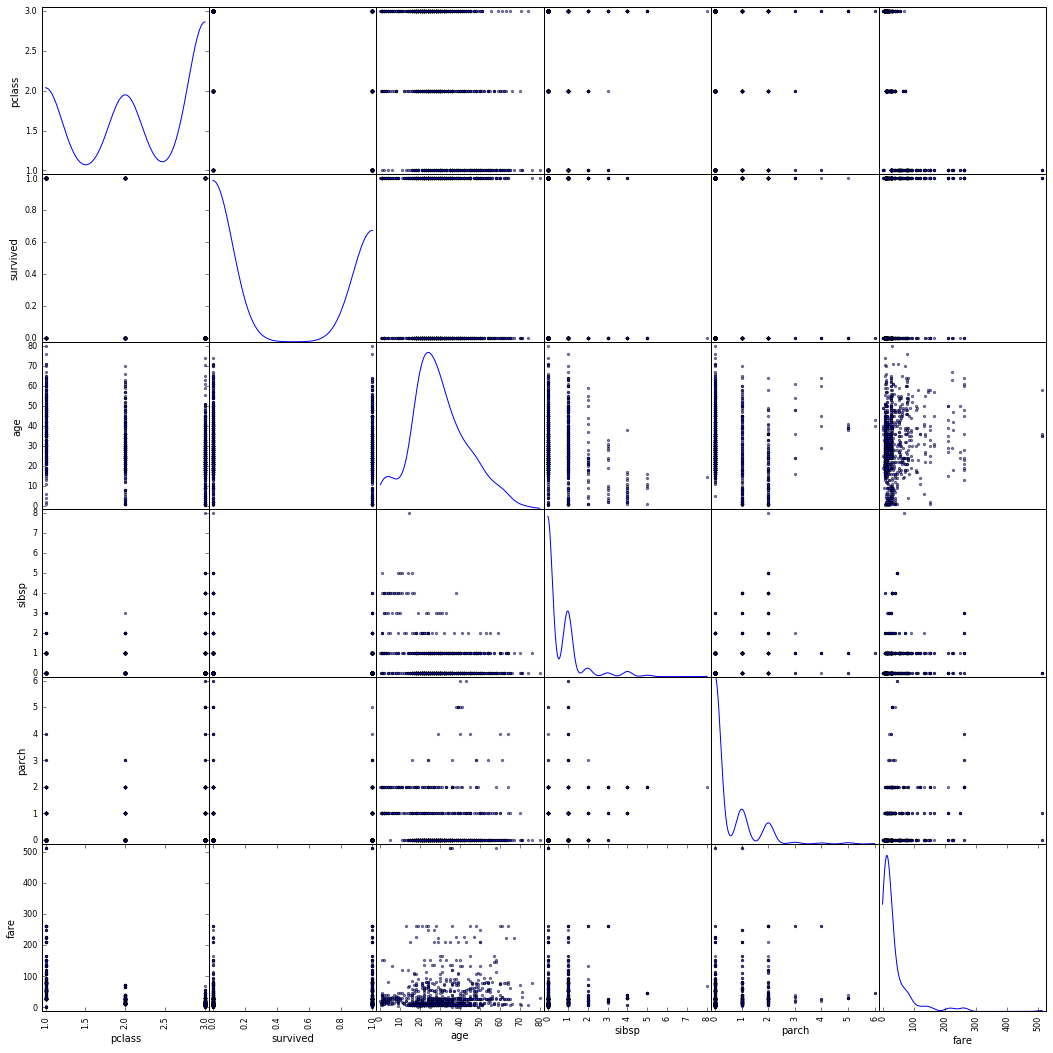

In [23]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(titanic, figsize = (18, 18), diagonal = 'kde');

Podemos ver algunos patrones: la mayoría de las personas ha pagado precio medio/ bajo por el viaje. 
La mayoría de los viajeros tenia alrededor de 30 años y viajaba sola.
La tercera clase era más barata de todas. En la clase mas alta no viajaban familias numerosas de más de 4 personas.

In [24]:
# clasifico las variables entre contínuas y categóricas
continuas=['age', 'fare']
categoricas=['pclass', 'sex','sibsp', 'parch']

### Análisis de las variables contínuas.

#### Variable "age"

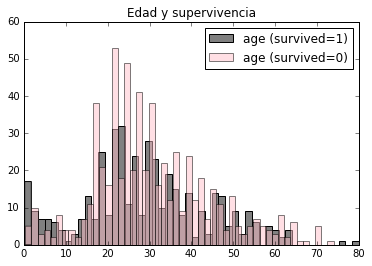

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(titanic['age'][titanic['survived'] == 1], bins=50, histtype='bar', color='grey', label='age (survived=1)') 
plt.hist(titanic['age'][titanic['survived'] == 0], bins=50, histtype='bar', color='pink', label='age (survived=0)', alpha=0.5)
plt.title('Edad y supervivencia')
plt.legend()
plt.show()

La variable edad no parece tener una relación lineal con supervivencia y se pueden ver ciertas agrupaciones según su valor. Voy a discretizar la variable en tres categorías: niños, adultos y mayores.

In [28]:
# Función para discretizar
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    print "Obteniendo el Woe para la variable", var, ":"    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))

In [47]:
titanic.loc[:, 'ageAgg'] = titanic['age'].map(lambda x: 'child' if x<12 else 'Old' if x > 60 else 'adult')
get_WoE(titanic, 'ageAgg', 'survived') 

Obteniendo el Woe para la variable ageAgg :
  El WoE para Old [ 32 ] es 1.09861228867
  El WoE para adult [ 922 ] es 0.409081748578
  El WoE para child [ 91 ] es -0.24294617861


El grupo de mayores tiene pocas observaciones y podría juntarla con el grupo de niños, pero como su patron de supervivencia parece distinto lo dejo separado.

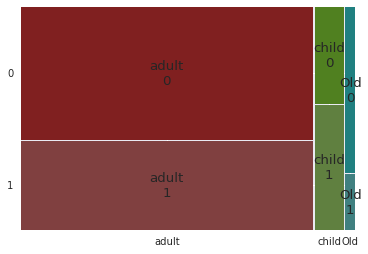

In [48]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['ageAgg','survived']);

Puedo ver que los niños parecen tener mayor porcentaje de supervivencia y los mayores el porcentaje más bajo.

#### Variable "fare"

Voy a graficar el histograma de los precios del billete dividiendo según la supervivencia para buscar un patrón.

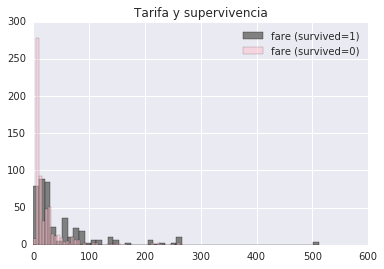

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(titanic['fare'][titanic['survived'] == 1], bins=50, histtype='bar', color='grey', label='fare (survived=1)') 
plt.hist(titanic['fare'][titanic['survived'] == 0], bins=50, histtype='bar', color='pink', label='fare (survived=0)', alpha=0.5)
plt.title('Tarifa y supervivencia')

plt.legend()

plt.show()

Se observa un patrón muy significativo para los pasajeros con los billetes más baratos. La supervivencia en este grupo es extremamente baja.

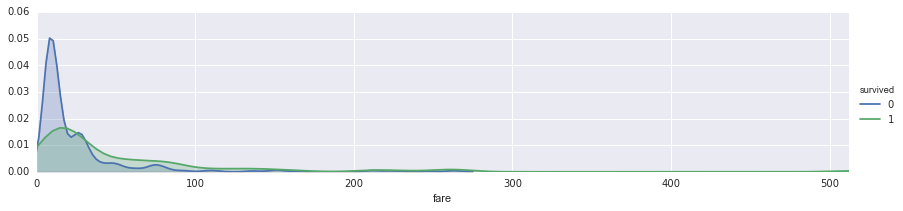

In [50]:
import seaborn as sns
%matplotlib inline
facet = sns.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sns.kdeplot,'fare',shade= True)
facet.set(xlim=(0, titanic['fare'].max()))
facet.add_legend()

Voy a discretizar la variable de precio, dividiendola en 3 categorías. Como frontera de separación para el precio barato pondré el precio cercano al que separa el percentil 25 de las observaciones. Para categoría "lujo" elijo precios muy altos"

In [51]:
titanic.loc[:, 'fareAgg'] = titanic['fare'].map(lambda x: 'PrecioBarato' if x < 9 else 'PrecioMedio' if x < 100 else 'PrecioLujo')
get_WoE(titanic, 'fareAgg', 'survived') 

Obteniendo el Woe para la variable fareAgg :
  El WoE para PrecioBarato [ 307 ] es 1.20115192798
  El WoE para PrecioLujo [ 79 ] es -0.952008814476
  El WoE para PrecioMedio [ 659 ] es 0.185660458059


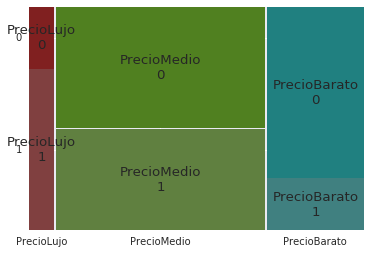

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['fareAgg','survived']);

Puedo observar un patron muy claro entre el precio del billete y la tasa de supervivencia: los pasajeros con billetes más caros se han salvado antes que los pasajeros con billetes baratos.

### Análisis de las variables categoricas.

Voy a revisar la ocurrencia de observaciones en las categorías específicas.

In [53]:
for variable in categoricas:

    print pd.crosstab(titanic['survived'], titanic[variable])
    print

pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

sex       female  male
survived              
0             96   522
1            292   135

sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0



Las variables "pclass" y "sex" tienen representación significativa en cada categoría. Sin embargo podemos ver que existen categorías con muy pocas observaciones para las variables "parch" y "sibsp". Vamos a verlo en detalle las variables categóricas.

#### Variable "pcclass" 

In [54]:
get_WoE(titanic, 'pclass', 'survived')

Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084


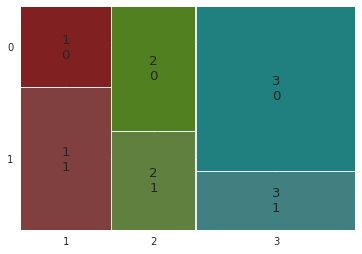

In [55]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['pclass','survived']);

Puedo observar que en cuanto baja la clase en la que ha viajado el pasajero también baja lasupervivencia de forma significativa.

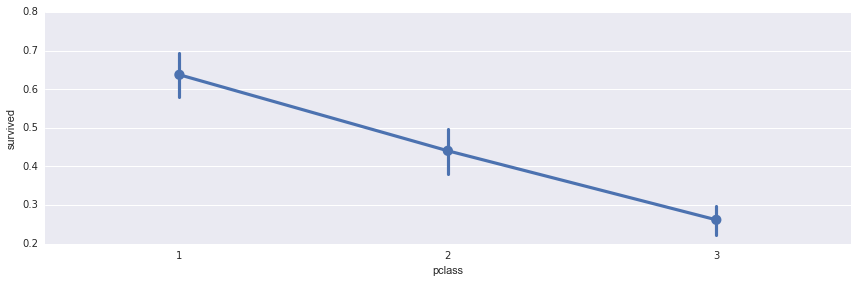

In [56]:
import seaborn as sns
%matplotlib inline
sns.factorplot('pclass','survived', data=titanic,size=4,aspect=3)

Voy a comprobar si la clase tiene relación con el precio del billete:

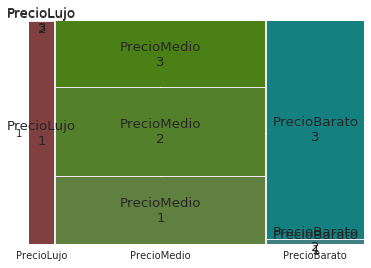

In [57]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['fareAgg','pclass']);

Se puede ver que los billetes más baratos eran sobre todo de tercera clase y los billetes más caros eran de primera clase. Dentro de los precios intermedios cabe bastante variedad. 

#### Variable "sibsp"

In [58]:
get_WoE(titanic, 'sibsp', 'survived')

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


Dentro de la variable "sibsp" las primeras dos categorías son bartante bien representadas y las siguientes tienen pocas observaciones.

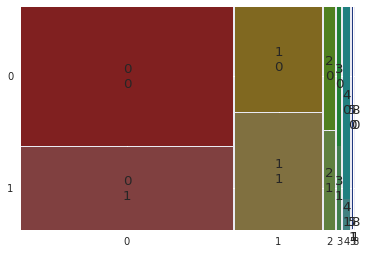

In [59]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['sibsp','survived']);

Observo que en las primeras dos categorías la supervivencia es mayor en caso de los pasajeros acompañados por algún hermano o pareja. En caso de mayor número de acompañantes la supervivecia parece bajar, aunque hay menos observaciones.

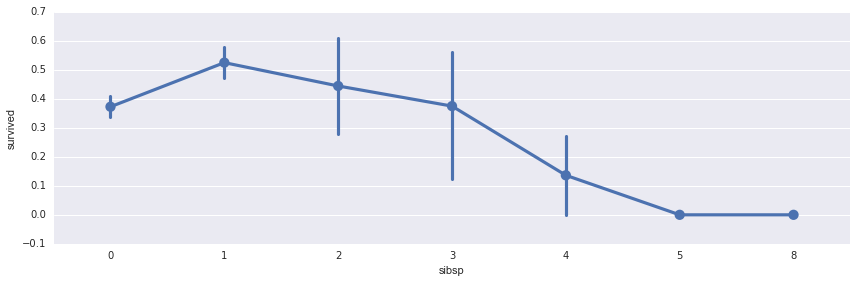

In [60]:
import seaborn as sns
%matplotlib inline

sns.factorplot('sibsp','survived', data=titanic,size=4,aspect=3)

Voy a agrupar la variable en dos categorias:solo o acompañado por uno o más acompañantes.

In [61]:
titanic.loc[:, 'sibspAgg'] = None

for row in titanic.index:
    if   titanic.loc[row, 'sibsp'] ==0:
        titanic.loc[row, 'sibspAgg'] = 'solo'
    elif titanic.loc[row, 'sibsp']==1:
        titanic.loc[row, 'sibspAgg'] = 'un_acomp'
    else:
        titanic.loc[row, 'sibspAgg'] = 'mas_acomp'

get_WoE(titanic, 'sibspAgg', 'survived') 

Obteniendo el Woe para la variable sibspAgg :
  El WoE para mas_acomp [ 81 ] es 0.806475865867
  El WoE para solo [ 684 ] es 0.52019337377
  El WoE para un_acomp [ 280 ] es -0.100083458557


Compruebo la supervivencia por categorías.

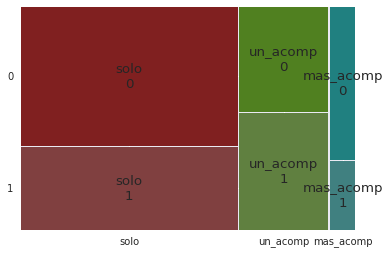

In [62]:
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['sibspAgg','survived']);

Parece que supervivencia fue mayor para los pasajeros acompañados de un solo acompañante.

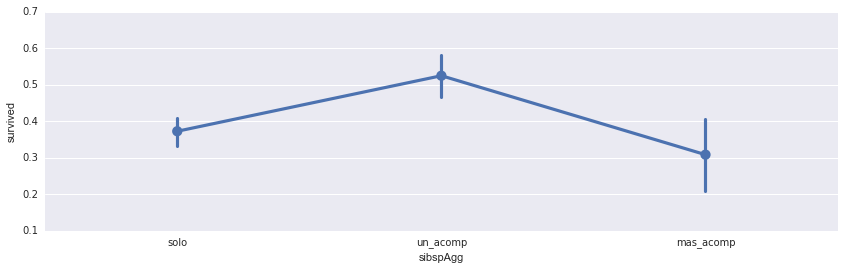

In [63]:
sns.factorplot('sibspAgg','survived', data=titanic,size=4,aspect=3)

#### Variable "parch"

In [64]:
get_WoE(titanic, 'parch', 'survived')

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


De forma parecido como en el caso de la variable sibsp existen pocas observaciones para las categorías 3-6 para la variable parch.

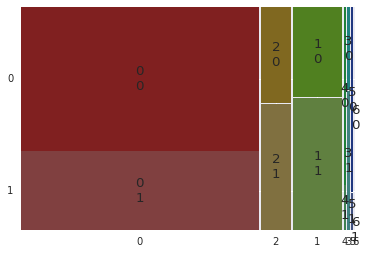

In [65]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['parch','survived']);

Supervivencia parece mayor en el caso de pasajeros acompañados de 1 o 2 personas.

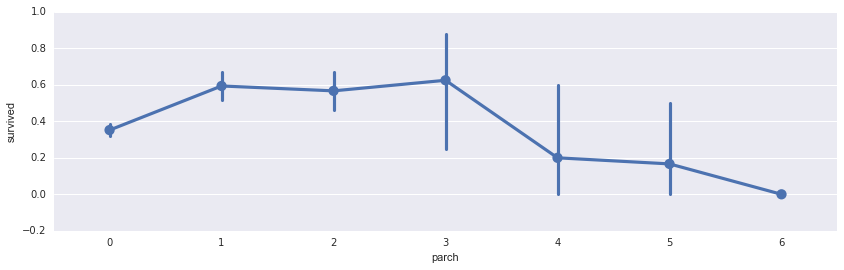

In [66]:
sns.factorplot('parch','survived', data=titanic,size=4,aspect=3)

Voy a agrupar la variable en dos categorías: solo o con familia.

In [67]:
titanic.loc[:, 'parchAgg'] = None

for row in titanic.index:
    if   titanic.loc[row, 'parch'] == 0:
        titanic.loc[row, 'parchAgg'] = 'solo'
    elif titanic.loc[row, 'parch'] in (1, 2, 3):
        titanic.loc[row, 'parchAgg'] = 'ConFamilia'
    else:
        titanic.loc[row, 'parchAgg'] = 'FamiliaNumerosa'

get_WoE(titanic, 'parchAgg', 'survived') 

Obteniendo el Woe para la variable parchAgg :
  El WoE para ConFamilia [ 265 ] es -0.342944751127
  El WoE para FamiliaNumerosa [ 13 ] es 1.70474809224
  El WoE para solo [ 767 ] es 0.610168067098


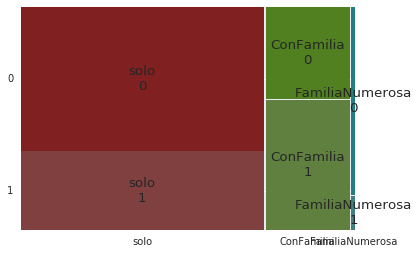

In [68]:
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['parchAgg','survived']);

Los pasajeros que viajaron con la familia parecen haber sobrevivido más que los que viajaron solos, al menos que sea una familia numerosa.

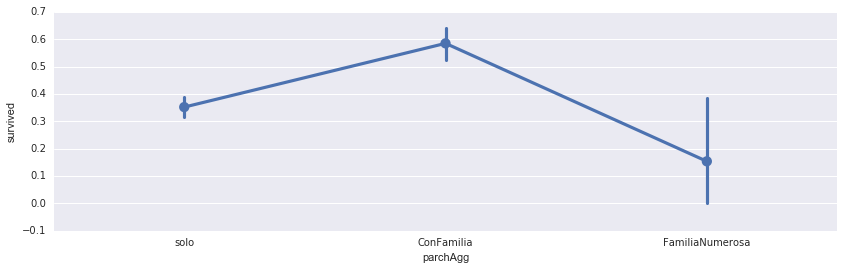

In [69]:
sns.factorplot('parchAgg','survived', data=titanic,size=4,aspect=3)

#### Variable "sex"

In [70]:
get_WoE(titanic, 'sex', 'survived')

Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944


La variable sexo está bien representada en ambas categorías.

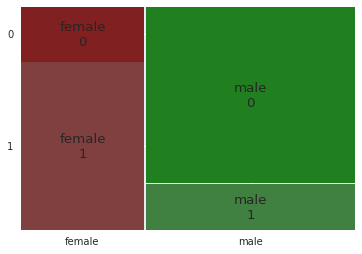

In [71]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['sex','survived']);

Las mujeres tienen tasa se supervivencia muy suerior que los hombres.

### Eliminación recursiva de variables

In [72]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,ageAgg,fareAgg,sibspAgg,parchAgg
0,1,1,female,29.00,0,0,211.3375,adult,PrecioLujo,solo,solo
1,1,1,male,0.92,1,2,151.5500,child,PrecioLujo,un_acomp,ConFamilia
2,1,0,female,2.00,1,2,151.5500,child,PrecioLujo,un_acomp,ConFamilia
3,1,0,male,30.00,1,2,151.5500,adult,PrecioLujo,un_acomp,ConFamilia
4,1,0,female,25.00,1,2,151.5500,adult,PrecioLujo,un_acomp,ConFamilia


In [73]:
del titanic['age']
del titanic['fare']
del titanic['sibsp']
del titanic['parch']

In [74]:
titanic.head() # todas las variables en el nuevo data frame son categóricas

,pclass,survived,sex,ageAgg,fareAgg,sibspAgg,parchAgg
0,1,1,female,adult,PrecioLujo,solo,solo
1,1,1,male,child,PrecioLujo,un_acomp,ConFamilia
2,1,0,female,child,PrecioLujo,un_acomp,ConFamilia
3,1,0,male,adult,PrecioLujo,un_acomp,ConFamilia
4,1,0,female,adult,PrecioLujo,un_acomp,ConFamilia


In [115]:
#separo en una variable las variables explicativas 
var_explicativas = titanic[['pclass','sex','ageAgg','fareAgg','sibspAgg','parchAgg']]
modelo_titanic = titanic[['survived','pclass','sex','ageAgg','fareAgg','sibspAgg','parchAgg']].copy()
modelo_titanic.head()

,survived,pclass,sex,ageAgg,fareAgg,sibspAgg,parchAgg
0,1,1,female,adult,PrecioLujo,solo,solo
1,1,1,male,child,PrecioLujo,un_acomp,ConFamilia
2,0,1,female,child,PrecioLujo,un_acomp,ConFamilia
3,0,1,male,adult,PrecioLujo,un_acomp,ConFamilia
4,0,1,female,adult,PrecioLujo,un_acomp,ConFamilia


Voy a separar las variables categóticas en dummies.

In [116]:
for var in var_explicativas:
    dummie = pd.get_dummies(modelo_titanic[var], prefix = var)
    names = list(dummie.columns)
    names.remove(names[0])
    modelo_titanic = pd.concat([modelo_titanic, dummie[names]], axis = 1)
    names = list(modelo_titanic.columns)
    names.remove(var)
    modelo_titanic = modelo_titanic[names]
    
modelo_titanic.head(5)

,survived,pclass_2,pclass_3,sex_male,ageAgg_adult,ageAgg_child,fareAgg_PrecioLujo,fareAgg_PrecioMedio,sibspAgg_solo,sibspAgg_un_acomp,parchAgg_FamiliaNumerosa,parchAgg_solo
0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Análisis VIF

Voy a comprobar colinealidad de las variablea con ayuda de análisis VIF.

In [117]:
from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
titanic_vif = modelo_titanic.copy(deep = True)
features = list(titanic_vif.columns)
features.remove('survived')
titanic_vif = titanic_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = titanic_vif[fet]
    y = modelo_titanic[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print 'El valor del VIF para la variable', var, 'es:', vif

El valor del VIF para la variable pclass_2 es: 1.74842338118
El valor del VIF para la variable pclass_3 es: 3.0886648942
El valor del VIF para la variable sex_male es: 1.11182514074
El valor del VIF para la variable ageAgg_adult es: 3.62535750639
El valor del VIF para la variable ageAgg_child es: 4.29417801831
El valor del VIF para la variable fareAgg_PrecioLujo es: 2.31658944516
El valor del VIF para la variable fareAgg_PrecioMedio es: 2.745370083
El valor del VIF para la variable sibspAgg_solo es: 4.17393136086
El valor del VIF para la variable sibspAgg_un_acomp es: 3.69070558972
El valor del VIF para la variable parchAgg_FamiliaNumerosa es: 1.10958508443
El valor del VIF para la variable parchAgg_solo es: 1.71754031512


Parece que no hay variables colineales. Entonces mantengo todas enel modelo.
Aunque me parece curioco que fare y clase no salen colineales, debe de ser por mucha variedad de precios en la segunda clase.

### Information value: análisis de fuerza explicativa

In [126]:
var_categoricas = ['pclass_2','pclass_3','sex_male','ageAgg_adult','ageAgg_child','fareAgg_PrecioLujo','fareAgg_PrecioMedio','sibspAgg_solo','sibspAgg_un_acomp','parchAgg_FamiliaNumerosa','parchAgg_solo']
var_target      = modelo_titanic['survived']

In [127]:
from sklearn.linear_model.logistic import LogisticRegression

result_IV = []

for v_cat in var_categoricas:
    var_target = array(var_target)
    var_values = array(modelo_titanic[v_cat])
    var_levels = unique(var_values)

    mat_values = numpy.zeros(shape=(len(var_levels),2))

    for i in range(len(var_target)):
        # Obtención de la posición en los niveles del valor
        for j in range(len(var_levels)):
            if var_levels[j] == var_values[i]:
                pos = j
                break

        # Estimación del número valores en cada nivel
        if var_target[i]:
            mat_values[pos][0] += 1
        else:
            mat_values[pos][1] += 1

        # Obtención del IV
        IV = 0
        for j in range(len(var_levels)):
            if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                IV += (rt - rf) * np.log(rt / rf)
        
    # Se agrega el IV al listado
    result_IV.append(IV)

for i in range(len(var_categoricas)):
    print "La variable", var_categoricas[i], "el IV es", result_IV[i]

La variable pclass_2 el IV es 0.112833168159
La variable pclass_3 el IV es 0.507856484462
La variable sex_male el IV es 1.35855179749
La variable ageAgg_adult el IV es 0.0858329862781
La variable ageAgg_child el IV es 0.120412104251
La variable fareAgg_PrecioLujo el IV es 0.533310955061
La variable fareAgg_PrecioMedio el IV es 0.253249845014
La variable sibspAgg_solo el IV es 0.136768378508
La variable sibspAgg_un_acomp el IV es 0.152218099715
La variable parchAgg_FamiliaNumerosa el IV es 1.2430706937
La variable parchAgg_solo el IV es 0.214312310293


Observo que la variable de edad no resulta muy significativa. Tampoco lo parece clase2 (segunda clase) mientras que por lo contrario la tercera clase tine mayor valor explicativo. El hecho de viajar acompañado no resulta de gran peso tampoco, salvo que sea una familia numerosa. Me quedo con las variables de mayor fuerza explicativa: sex_male,pclass_3, fareAgg_PrecioLujo y parchAgg_FamiliaNumerosa.

In [132]:
modelo_titanic_def = modelo_titanic[['survived','sex_male','pclass_3','fareAgg_PrecioLujo']]
modelo_titanic_def.head()

,survived,sex_male,pclass_3,fareAgg_PrecioLujo
0,1,0.0,0.0,1.0
1,1,1.0,0.0,1.0
2,0,0.0,0.0,1.0
3,0,1.0,0.0,1.0
4,0,0.0,0.0,1.0


### Muestras de entrenamiento y test

Voy a dividir el data set en dos partes: entrenamiento y test.

In [134]:
from sklearn.cross_validation import train_test_split
var_categoricas=['sex_male','pclass_3','fareAgg_PrecioLujo']
# Obtenemos las muestras de entrenamiento (80%) y test (20%)
x = modelo_titanic_def[var_categoricas]
y = modelo_titanic_def['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Modelo de regresión logistica

Como estimador de la suervivencia usaré un modelo de regresión logística:

In [135]:
from sklearn.linear_model.logistic import LogisticRegression

# Crear el modelo
rlog = LogisticRegression() 

# Entrenamiento
classifier = rlog.fit(x_train, y_train) 

# Predicciones
y_predic_train = classifier.predict(x_train) 
y_predic_test = classifier.predict(x_test)

Voy a comparar los resultados del modelo en la muestra de entrenamiento y test.

In [137]:
# Verificamos la exactitud del modelo
train = (y_predic_train == y_train).sum().astype(float) / y_train.shape[0]
print("exactitud train: {0:.2f}".format(train))
test = (y_predic_test == y_test).sum().astype(float) / y_test.shape[0]
print("exactitud test: {0:.2f}".format(test))

exactitud train: 0.77
exactitud test: 0.79


El modelo no empeora en el test. Esto significa que el modelo no está sobre entrenado.

### Comprobación de bondad del modelo.

Voy a comprobar la bondad del modelo con ayuda de la matriz de confusión.

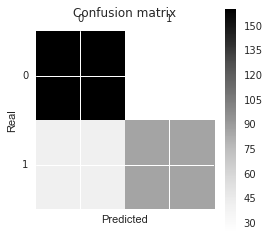

In [141]:
cm = confusion_matrix(y_test, y_predic_test)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

Parece que el modelo predicebastante bien. Los vardaderos positivos y verdaderos negativos son los más numerosos. 